
***
<center>

# R2.09 Méthodes Numériques
## TP1. A warren of rabbits
    
### T. Godin, T. Ferragut, L. Naert
       
</center>

***
***

Le but principal de ce TP est de vous donner un aperçu de l'analyse quantitative et qualitative sur les suites ; et de s'approprier les outils que l'on utilisera tout au long du module.

On commence par reprendre les questions de l'introduction à Python, avant de parler de complexité

In [1]:
#import divers, ne pas prendre en compte
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

import time
import random

from IPython.display import HTML      # For animation
from matplotlib import animation      # For animation


In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
#see https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a more complete introduction to mathplot

# 1: 1 lapin, 2 lapins, 3 lapins ...

Un mathématicien (très) naïf a entendu dire que les lapins se reproduisent. Il suppose donc que si on commence avec $a$ lapins, la population devrait augmenter.

Ayant des connaissances (très) limitées en biologie, il propose de modéliser le nombre de lapins avec la suite la plus simple qu'il connaisse, la **suite arithmétique**.


Voici une implémentation récursive de cette suite $u_0=a$ ; $u_{n+1}=u_n + r$.

In [3]:
def arithmetic_rec(r,a,n):
    '''
    in: common adding r, initial term , number of iterations n
    type: a float, r float, n int
    return: n-th term of the arithmetic progression
    rtype:float
    '''
    if n==0:
        return a
    else :
        return arithmetic_rec(r,a,n-1) +r
    
arithmetic_rec(2,11,5)

21


**question 1:** 
écrire une fonction <tt> arithmetic </tt> qui calcule $u_n$ de manière impérative (c-à-d avec une boucle).

Donner une formule explicite pour $u_n$


In [4]:
def arithmetic(r,a,n):
    '''
    in: common adding r, initial term , number of iteration n
    type: q float, r float, n int
    return: n-th term of the arithmetic progression
    rtype:float
    '''
    u=a
    for i in range(n):
       u = u+r 
    return u

#un=a+r*n

On peut maintenant tracer les $100$ premiers termes de la suite.






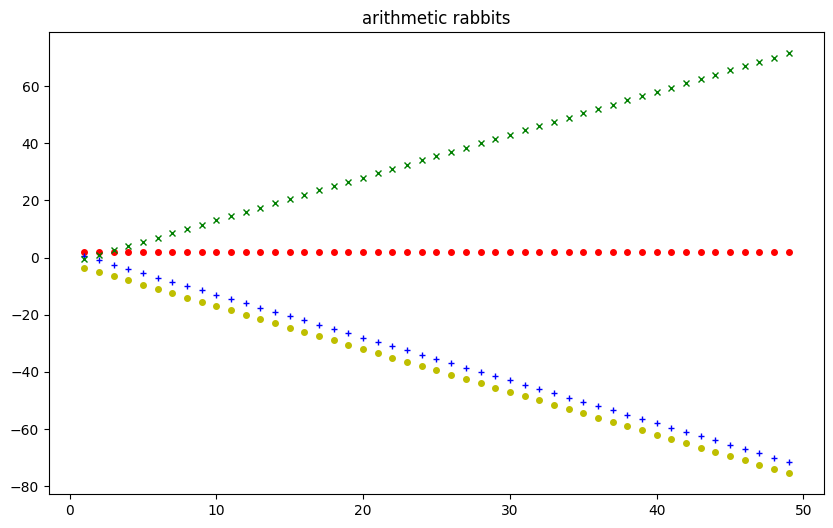

In [5]:
rg = range(1, 50)
s1 = [arithmetic_rec(0,2,n) for n in rg]
s2 = [arithmetic_rec(-1.5,2,n) for n in rg]
s3 = [arithmetic_rec(1.5,-2,n) for n in rg]
s4 = [arithmetic_rec(-1.5,-2,n) for n in rg]

plt.title('arithmetic rabbits')
plt.plot(rg, s1, 'ro', markersize=4)
plt.plot(rg, s2, 'b+', markersize=4)
plt.plot(rg, s3, 'gx', markersize=4)
plt.plot(rg, s4, 'yo', markersize=4)

plt.show()



**question 2** Décrire tous les comportements possibles pour $u_n$ selon les choix de $a$ et $r$. Quels choix sont pertinents ici en terme de modélisation ?



| behaviour of $u_n$ | $r<0$ | $r=0$ | $r>0$ |
| :- | -: | :-: |---|
| $a<0$ | décroissante | constante| croissante
| $a=0$ |décroissante  | constante| croissante
| $a>0$ | décroissante | constante| croissante


# 2: 1 couple of rabbits, 2 couples of rabbits, 4 couples of rabbits


Une mathématicienne _bien mieux informée_ (mais qui n'a clairement pas souvent vu de vrais lapins) sait que les lapins ont des lapereaux qui peuvent eux-mêmes se reproduire. Elle propose donc une autre modélisation de la croissance de la population : la **suite géométrique** $u_0=a$ ; $u_{n+1}=qu_n$.

_Cette modélisation simpliste est une théorie qui a réellement été proposée au XIXème siècle par Thomas R. Malthus, qui prédisait alors une  [explosion démographique](https://en.wikipedia.org/wiki/Malthusianism) et en tirait certaines conclusions très politiques_

Voici une implémentation récursive de cette suite, $u_0=a$ ; $u_{n+1}=qu_n$.

In [6]:
def geometric_rec(q,a,n):
    '''
    in: common ratio q, scale factor a, number of iteration n
    type: q float, a float, n int
    return: n-th term of the geometric progression
    rtype:float
    '''
    if n==0:
        return a
    else :
        return q*geometric_rec(q,a,n-1)
    
geometric_rec(2,11,5)

352


**question 1:** Écrire une fonction <tt>geometric</tt> qui calcule $u_n$ de manière impérative (c-à-d avec une boucle).

Donner une formule explicite pour $u_n$

In [7]:
def geometric(q,a,n):
    '''
    in: common ratio q, scale factor a, number of iteration n
    type: q float, a float, n int
    return: n-th term of the geometric progression
    rtype:float
    '''
    
    u=a
    for i in range(n):
        u=u*q
    return u

#un=a*q^n


On peut maintenant tracer les $100$ premiers termes de la suite.

Dans ce genre de situation, comme $u_n$ augmente très rapidement, il peut-être intéressant de tracer $\log u_n$. On parle _d'échelle logarithmique_.

Quelles sont vos observations ?



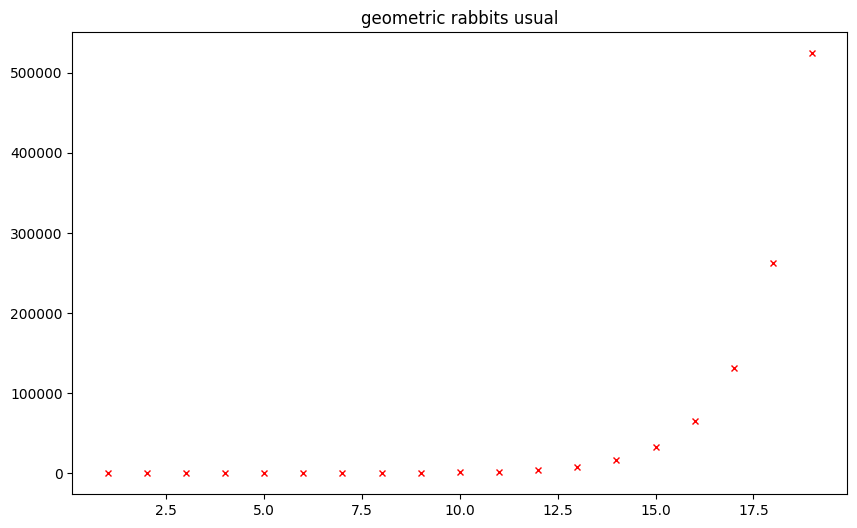

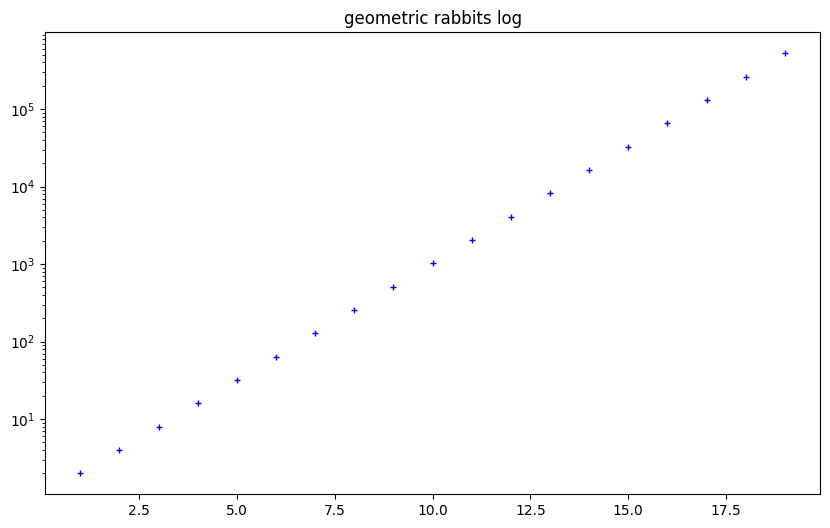

In [8]:
rg = range(1, 20)
s1 = [geometric_rec(2,1,n) for n in rg]
plt.title('geometric rabbits usual')
plt.plot(rg, s1, 'rx', markersize=4)
plt.show()


plt.title('geometric rabbits log')
plt.yscale('log')
plt.plot(rg, s1, 'b+', markersize=4)
plt.show()



**question 2**  Décrire tous les comportements possibles pour $u_n$ selon les choix de $a$ et $r$. Quels choix sont pertinents ici en terme de modélisation ?


| behaviour of $u_n$ | $q<0$ | $q=0$ | $0<q<1$ |$q=1$ |$1<q$ |
| :- | -: | :-: |---| :-: |---|
| $a<0$ | ni croissant, ni décroissant |constant |croissant |constant | décroissant
| $a=0$ | constant |constant | constant|constant | constant
| $a>0$ |ni croissant, ni décroissant  |constant  |décroissant |constant |croissant

**question 3** Comparer les croissances des populations selon le choix de modélisation pour des choix raisonnables de paramètres (si le temps le permet, tracer par exemple le ratio)

# 3: 1 couple of  rabbits, 1 couple of rabbits and 1 couples kittens, 2 couples of rabbits and 1 couple of kittens, 3 couples of rabbits and 2 couples of kittens ... the Fibonacci sequence

[Leonardo Fibonacci](https://fr.wikipedia.org/wiki/Leonardo_Fibonacci), qui a probablement réellement vu des lapins<sup>[reference needed][]</sup> savait que les jeunes lapins ne peuvent pas se reproduire la première année, il suggéra donc que le nombre de lapins l'année  $n+1$ devrait être le nombre de lapins à l'année  $n$ plus le nombre de lapins adultes, c-à-d le nombre de lapins l'année $n-1$. 

[reference needed]: https://en.wikipedia.org/wiki/Wikipedia:Citation_needed



On rappelle que la suite de Fibonacci est définie par $F_0=1 , =F_1=1$ et $F_{n+2} = F_{n+1} + F_n$



## Comparaison d'algorithmes

**Le but de cette partie va être de comparer l'efficacité en temps (c'est-à-dire la complexité algorithmique) de plusieurs implémentations de la suite de Fibonacci**

**question 1** écrire une fonction (naïve) `Fibonacci` qui calcule $F_n$.
Jusqu'où pouvez vous aller en moins de 30 secondes ?



In [9]:
def Fibonacci_naive(n):
    if n == 0 or n == 1:
        return 1
    else:
        return Fibonacci_naive(n-1) + Fibonacci_naive(n-2)


start = time.time()
Fibonacci_naive(35)
end = time.time()

print(end - start)

for i in range(10):
    print(Fibonacci_naive(i))

1.7562196254730225
1
1
2
3
5
8
13
21
34
55


On se propose de tracer le temps nécessaire pour calculer $F_n$ comme fonction de $n$ pour  $n\leq 35$


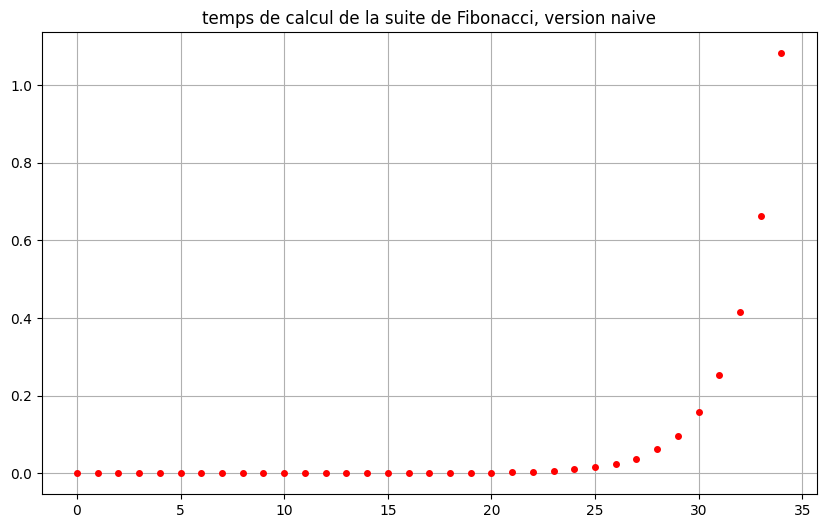

In [10]:
n=35
rg = range(0, n)
t=[0 for i in rg]
for i in rg:
    start = time.time()
    Fibonacci_naive(i)
    end = time.time()
    t[i]=end-start


plt.title('temps de calcul de la suite de Fibonacci, version naive')

plt.plot(rg, t, 'ro', markersize=4)
plt.grid()
plt.show()

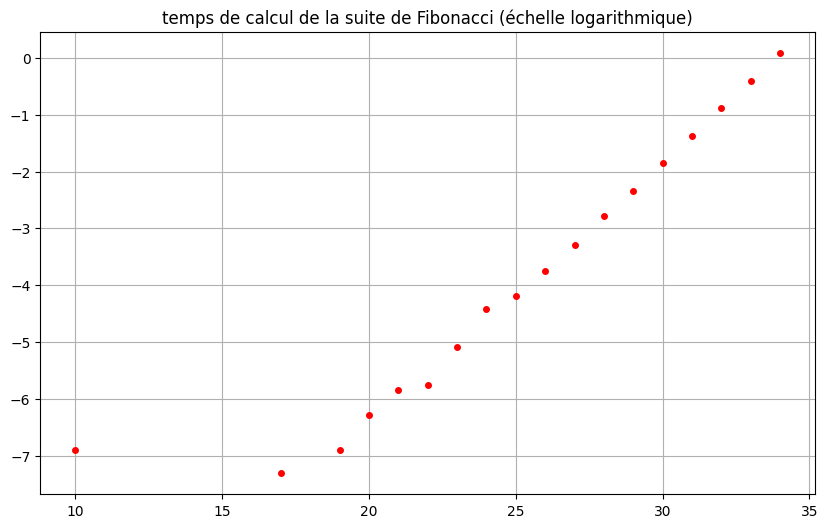

In [11]:
#échelle log



plt.title('temps de calcul de la suite de Fibonacci (échelle logarithmique)')

plt.plot(rg, np.log(t), 'ro', markersize=4)


plt.grid()
plt.show()



La version naïve de calcul de Fibonacci s'appelle 2 fois recursivement à chaque passe. Le temps de calcul est donc exponentiel.

On va chercher à optimiser cela.

**question 2:** écrire une fonction _de complexité linéaire (une boucle ou un appel recursif par passe)_ <tt> fibonacci(n,a,b)</tt>  qui renvoie $[F_{n-1},F_{n}]$ pour l'appel `fibonacci(n,1,1)`


Calculer $F_{500}$ et tracer le temps nécessaire pour calculer $F_n$ comme fonction de $n$ pour  $n\leq 250$


70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501
26863810024485359386146727202142923967616609318986952340123175997617981700247881689338369654483356564191827856161443356312976673642210350324634850410377680367334151172899169723197082763985615764450078474174626
1
1
2
3
5


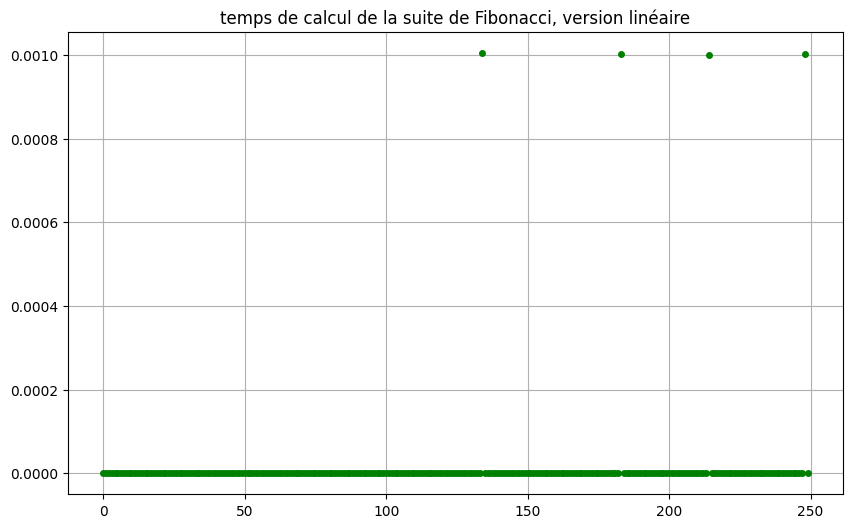

In [13]:
def recursive_fibo(n, a, b):
    if n == 0:
        return b
    else:
        return recursive_fibo(n - 1, a + b, a)


print(recursive_fibo(1000,1,1))   
print(recursive_fibo(1000,0,1))   


for i in range(5):
    print(recursive_fibo(i,1,1))
n=250

rg = range(0, n)
t=[0 for i in rg]
for i in rg:
    start = time.time()
    recursive_fibo(i,0,1)
    end = time.time()
    t[i]=end-start

    
plt.title('temps de calcul de la suite de Fibonacci, version linéaire')

plt.plot(rg, t, 'go', markersize=4)
plt.grid()
plt.show()    

In [71]:
def iterativ_fibo(n):
    FiboL = list()
    for i in range(n+1):
        if i < 2 :
            FiboL.append(1)
        else:
            FiboL.append(FiboL[n-1] + FiboL[n-2])
    return FiboL[-1]

In [72]:
def recursive_fibo(n, a, b):
    if n == 0:
        return b
    else:
        return recursive_fibo(n - 1, a + b, a)

start = time.time()
recursive_fibo(35, 1, 1)
end = time.time()
print(end - start)
print(recursive_fibo(5, 1, 1))

0.0
8


On peut faire (bien) mieux que linéaire, mais il va falloir faire des maths plus compliquées et **utiliser des matrices**

**question 3** Calculer $
\begin{pmatrix}
	u_{1} \\
	u_{2} \\
\end{pmatrix} = 
\begin{pmatrix}
	0 & 1\\
	1 & 1\\
\end{pmatrix} 
\begin{pmatrix}
	0 \\
	1 \\
\end{pmatrix}  $


Calculer maintenant $\begin{pmatrix}
	u_{n} \\
	u_{n+1} \\
\end{pmatrix} =\begin{pmatrix}
	0 & 1\\
	1 & 1\\
\end{pmatrix}  \begin{pmatrix}
	u_{n-1} \\
	u_{n} \\
\end{pmatrix}  $

En utilisant cela, `np.array`, `np.dot`, `np.linalg.matrix_power` et eventuellement d'autres fonction numpy, calculer  $F_{500}$.

In [14]:
def matrix_fibo(n):
    m = np.array( [[0, 1], [1, 1]] )
    p = m
    for i in range(n-1):
        p = p@m
    return p@np.array( [1, 1] )

Tracer le temps nécessaire pour calculer $F_n$ comme fonction de $n$ pour  $n\leq 25000$

On a ici un compromis : on utilise des maths plus poussées, mais la compléxité passe de linéaire ($O(n)$) à logarithmique ($O(\ln n)$).

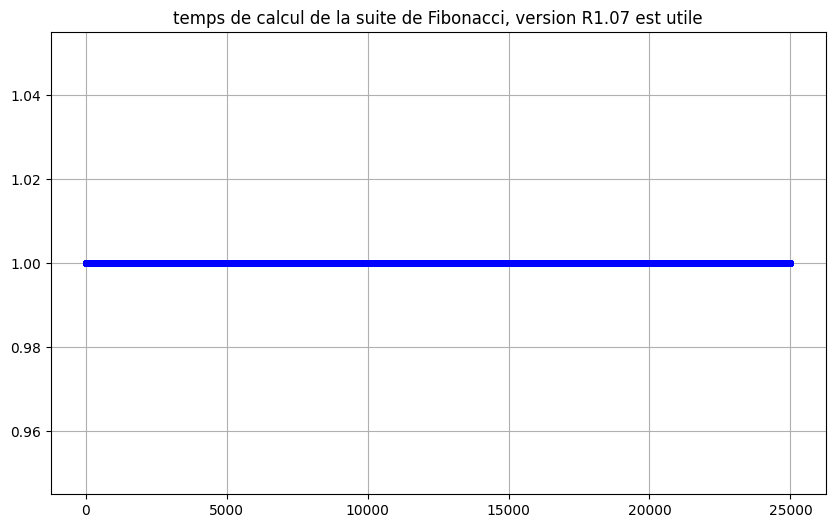

In [15]:
n=25000
rg = range(0, n)
t=[0 for i in rg]

plt.title('temps de calcul de la suite de Fibonacci, version R1.07 est utile')

plt.plot(rg, np.exp(t), 'bo', markersize=4)
plt.grid()
plt.show()  

**question 4** Summarize your observations about these 3 methods.

_TODO_

**question bonus**
Tracer (de manière classique et en échelle <tt>log</tt>) la suite $F_n$ pour $n\leq 250$. Qu'observez vous ? Proposer une approximation de $F_n$ pour $n$ très grand.


Pour aller (encore) plus loin, vous pouvez tracer la suite des quotients $(\frac{F_{n+1}}{F_n})_n$

_Un nombre pertinent ici est le nombre d'or $\phi =\frac{1+\sqrt{5}}{2} \approx 1,618$_

### Bonus : encore plus de modèles : Discrete time logistic map

Un biologiste passant par là jette un coup d'œil sur le travail des mathématiciens, et, après un moment de choc et d'effroi, leur explique que les lapins ne peuvent pas se reproduire à l'infini<sup>[reference needed][]</sup> et sont rarement immortels  et peuvent, s'ils sont affamés car la population dépasse la quantité de ressource disponible, mourir.


Pour améliorer le modèle, il propose de suivre [Pierre François Verhulst](https://fr.wikipedia.org/wiki/Pierre_Fran%C3%A7ois_Verhulst) et de supposer que la population ne peut en aucun cas excéder une certaine valeur, $M$

On suppose également que le taux de reproduction est proportionel au nombre de lapins, mais ralenti si les ressources diminue, avec un taux de  $\rho$

On obtient la suite :

$$p_{n+1} = \rho p_{n}(M-p_{n}) $$

_remarque_ au lieu d'utiliser 2 paramètres, on va poser $x_n = \frac{p_n}{M}$ (donc$0\leq x_n \leq 1$ est la portion de lapins par rapport à la population maximale.

Alors : 
\begin{align*}
\frac{1}{M}p_{n+1} &= \frac{\rho}{M}( p_{n}M(1-\frac{p_{n}}{M})) \\
x_{n+1} &= {M\rho}x_{n}(1-x_{n})
\end{align*}

Si on pose $\mu = M \rho$, on trouve la version classique de la **suite logistique**

$$x_{n+1} = \mu x_{n}(1-x_{n}) $$


[reference needed]: https://www.explainxkcd.com/wiki/index.php/285:_Wikipedian_Protester

**question 1**  Écrire une fonction <tt>logistic</tt> qui prend en paramètre $\mu$ et $x$, et qui retourne $\mu x  (1 - x)$

In [16]:
#https://www.imo.universite-paris-saclay.fr/~perrin/Conferences/logistiqueDP.pdf
#https://www.imo.universite-paris-saclay.fr/~perrin/Conferences/logistiqueDP2.pdf

def logistic(mu, x): 
    return mu*x*(1 - x)

**question 2** Étudier l'évolution de la population pour ce modèle, en prenant comme ratio initial $x_0 =.42$ et comme paramètre $\mu = 1.5$

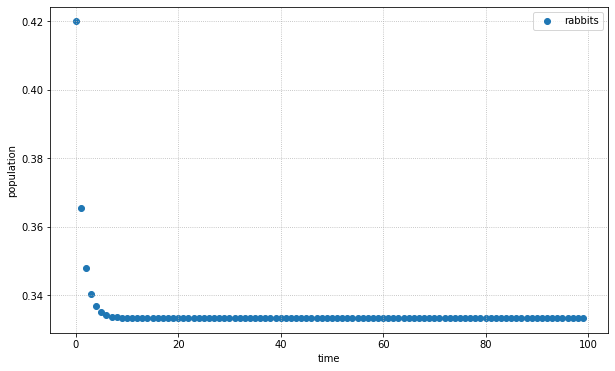

In [30]:
plt.scatter(t, y, label='rabbits')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

**question 2 bis** Même question avec ratio initial $.1$ et paramètre $\mu = 2.7$

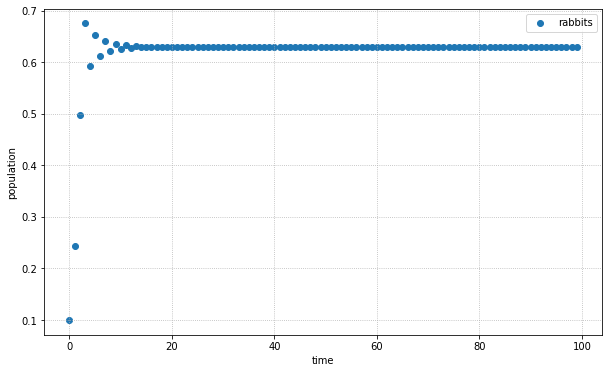

In [33]:
mu = 2.7
y0= .1
y=np.zeros((100))
t = np.linspace(0, 99, 100)


y[0]=y0
for i in range(1,100):
    y[i]=logistic(mu,y[i-1])
    
plt.scatter(t,y, label='rabbits')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

**question 2 ter** Même question avec ratio initial $.1$ et paramètre $\mu = 3.2$

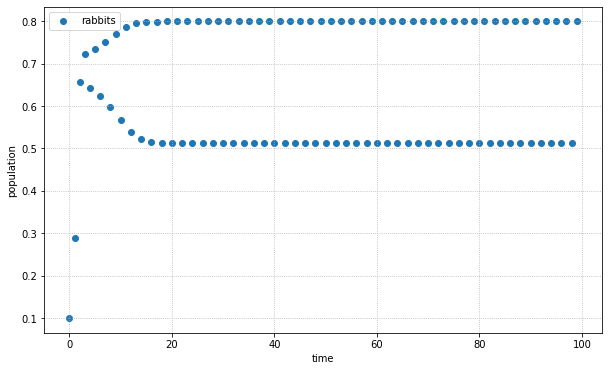

In [34]:
mu = 3.2
y0= .1
y=np.zeros((100))
t = np.linspace(0, 99, 100)


y[0]=y0
for i in range(1,100):
    y[i]=logistic(mu,y[i-1])
    
plt.scatter(t,y, label='rabbits')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

### Bonus YAPoMo: yet another population model : Discrete time Lotka-Volterra model

    
Dans la nature, les lapin vivent dans un environnement dangereux et font face à de nombreux danger ([sauf en Australie](https://en.wikipedia.org/wiki/Rabbits_in_Australia)).

Parmi ces dangers, les renards.

On suppose que les lapins se reproduisent (avec un taux $\alpha$) mais sont parfois mangés par les renards (avec un taux $\beta$).

D'un autre côté, la population de renards est aussi influencée par la population de lapins : les renards se reproduisent plus s'ils peuvent beaucoup manger (c-à-d s'il y a beaucoup de lapins) mais leur population décroit s'ils sont trop nombreux et rentrent en concurence pour la nouriture.


En prenant cela en compte, une seconde biologiste venue à la rescousse des matheux propose d'utiliser deux suites, définies et reliées par les équations :

$\begin{cases} x_{n+1} &= (\alpha+1)x_n -\beta x_ny_n \\
y_{n+1} &= (-\gamma+1)y_n + \delta x_ny_n
\end{cases}$


_Historiquement, ces équations ont été proposées par Lotka (pour expliquer des réactions chimiques) et indépendamment par Volterra (pour expliquer pourquoi, après la première guerre mondiale, les stock de poissons avaient diminués alors que la pêche s'était quasiment arrêtée  pendant 4 ans)_

In [35]:
#https://webusers.imj-prg.fr/~pierre-antoine.guiheneuf/Fichiers/LotkaDiscret.pdf


#pas de temps (le système est la discrétisation d'une équation continue)
h=0.01

# Parameters.
a = 0.5*h
b = 0.01*h
c = 0.1*h
d = 0.01*h

t0 = 0.0       # Initial time.
t1 = 200.0     # Final time.
y0 = [10, 25]  # Initial population of species 0 and 1.



In [36]:
t = np.arange(t0, t1, h)


y=np.zeros((len(t),2))

y[0]=y0
for i in range(1,len(t)):
    xn,yn=y[i-1]
    y[i]=[(a +1)*xn -b*xn*yn,(-c+1)*yn + d*xn*yn]
    
print(y)


[[10.         25.        ]
 [10.025      25.        ]
 [10.0500625  25.0000625 ]
 ...
 [ 3.42409256 80.04602282]
 [ 3.41380453 79.99338529]
 [ 3.40356537 79.94070009]]


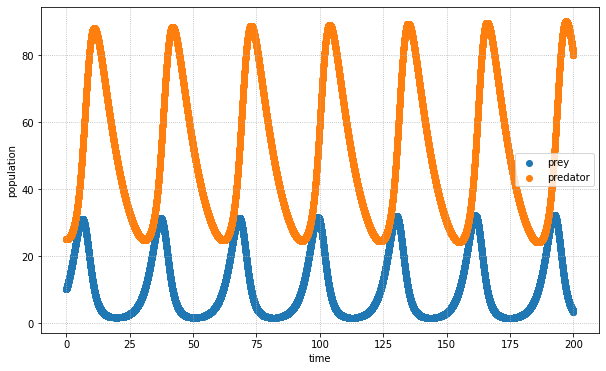

In [37]:
plt.scatter(t, y[:, 0], label='prey')
plt.scatter(t, y[:, 1], label='predator')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

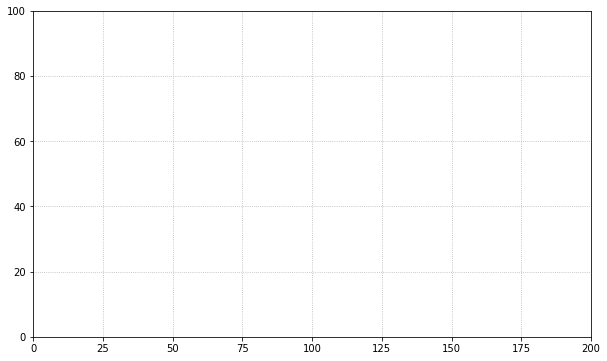

In [38]:
# Same plot, but as an animation.
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
FRAMES = 200

fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))  # Range of x-axis.
ax.set_ylim((0, 100))  # Range of y-axis.

line0 = ax.plot([], [], lw=2)[0]
line1 = ax.plot([], [], lw=2)[0]

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    return [line0, line1]

def animate(i):
    # Take only first (i/FRAMES) of the total number of points.
    k = len(t) * i // FRAMES
    line0.set_data(t[:k], y[:k, 0])
    line1.set_data(t[:k], y[:k, 1])
    return [line0, line1]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=50, blit=True)
#une fenêtre vide s'ouvre, c'est normal

In [75]:
# Create a video.
HTML(anim.to_html5_video())

NameError: name 'anim' is not defined